# House Price Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Sizesqft-Pricethousands.csv')
print(data)

    Size_1000sqft  Price_thousands
0               8           155.93
1              10           169.75
2              12           211.99
3              14           256.02
4              16           247.40
5              19           273.92
6              21           336.70
7              23           346.99
8              25           348.77
9              27           395.53
10             30           401.93
11             32           428.41
12             34           469.08
13             36           452.49
14             38           482.78
15             41           532.55
16             43           550.06
17             45           603.12
18             47           605.20
19             50           621.75


In [6]:
x_train = data.Size_1000sqft[:-4]
# x_train = (x_train - x_train.mean()) / x_train.std()
y_train = data.Price_thousands[:-4]
print(x_train)
print(y_train)

0      8
1     10
2     12
3     14
4     16
5     19
6     21
7     23
8     25
9     27
10    30
11    32
12    34
13    36
14    38
15    41
Name: Size_1000sqft, dtype: int64
0     155.93
1     169.75
2     211.99
3     256.02
4     247.40
5     273.92
6     336.70
7     346.99
8     348.77
9     395.53
10    401.93
11    428.41
12    469.08
13    452.49
14    482.78
15    532.55
Name: Price_thousands, dtype: float64


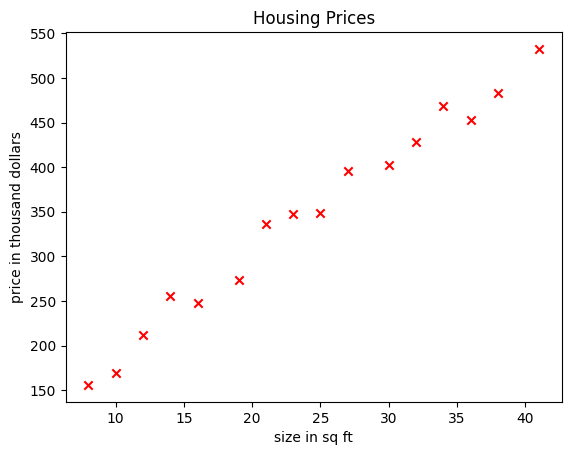

In [7]:
plt.scatter(x_train, y_train, marker='x', c = 'r')
plt.title('Housing Prices')
plt.xlabel('size in sq ft')
plt.ylabel('price in thousand dollars')
plt.show()

In [8]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    
    total_cost = cost / (2*m)
    return total_cost

In [9]:
print(compute_cost(x_train, y_train, 0, 0))

65570.61651875


In [10]:
def compute_derivative(x, y, w, b):
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += (w * x[i] + b - y[i]) * x[i]
        dj_db += (w * x[i] + b - y[i])
    
    dj_db *= (1/m)
    dj_dw *= (1/m)

    return dj_dw, dj_db

In [11]:
def final_parameters(x, y, w, b, alpha):

    for i in range(100000):
        dj_dw, dj_db = compute_derivative(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    return w, b 

In [12]:
w, b = final_parameters(x_train, y_train, 0, 0, 1e-4)
print(w, b)

11.606881700799732 61.72059671573862


In [13]:
def compute_model_output(x, w, b):

    m = x.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

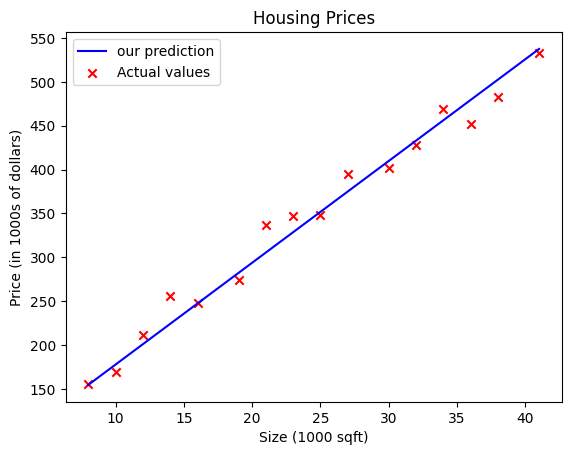

In [14]:
our_prediction = compute_model_output(x_train, w, b)
plt.plot(x_train, our_prediction, c = 'b', label='our prediction')
plt.scatter(x_train, y_train, c = 'r', marker='x', label = 'Actual values')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [17]:
area = 45
prediction = w * area + b
print(prediction)

584.0302732517266
